# Segmentation

- 모델명 : xxxxx-seg

## 모델로딩

In [1]:
from ultralytics import YOLO
import numpy as np
import cv2

In [2]:
MODEL_PATH = r'models/yolov8n-seg.pt'
FILES_PATH = r'test_image_seg/beatles.jpg'

In [6]:
# 모델생성
model = YOLO(MODEL_PATH)

In [7]:
result_list = model(FILES_PATH, save=True, save_txt=True, line_thickness=1)


image 1/1 C:\Classes\07_vision\yolo\test_image_seg\beatles.jpg: 640x640 5 persons, 9 cars, 1 truck, 250.2ms
Speed: 1.0ms preprocess, 250.2ms inference, 27.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict
1 label saved to runs\segment\predict\labels


In [5]:
type(result_list), type(result_list[0])

(list, ultralytics.yolo.engine.results.Results)

In [10]:
# 여러개 이미지 추론
model2 = YOLO(MODEL_PATH)
IMAGE_FILES_PATH = [r'test_image_seg/beatles.jpg', 'cat.jpg']
result_list2 = model2(IMAGE_FILES_PATH, save=True, save_txt=True, conf=0.5)


0: 640x640 5 persons, 3 cars, 1: 640x640 1 cat, 457.2ms
Speed: 2.4ms preprocess, 228.6ms inference, 18.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict3
2 labels saved to runs\segment\predict3\labels


In [9]:
len(result_list2)

2

## Segmentation 추론결과 조회
- segmentation 추론 결과는 Masks를 이용해 분할된 mask 정보와 Boxes를 이용해 추론한 bounding box의 결과를 조회한다.
- **ultralytics.yolo.engine.results.Masks**
    - Segmentation 의 결과 type
    - Results.masks 로 조회한다.
    - 주요 속성, 메소드
        - shape: [object 개수, height, width]
            - height, width: mask image size
        - data/masks: 결과 Tensor(3차원 배열) 반환. `0: 배경, 1: 물체` 를 원소로 가지는 결과 Tensor를 반환한다.
            - 픽셀별로 물체 인지 아닌 지를 표현하는 tensor를 반환
        - segments : mask의 bounding 좌표(경계선 좌표)를 물체별로 list에 담아서 반환한다.
            - 물체의 외곽선을 그리는 좌표들을 반환
- **ultralytics.yolo.engine.results.Boxes**
     - Results.boxes로 조회
    - 주요 속성
        - shape: 결과 shape. (찾은 물체개수, 6)
        - boxes
            - 6: 좌상단 x, 좌상단 y, 우하단 x, 우하단 y, confidence score, label
        - xyxy
            - bounding box의 `좌상단 x, 좌상단 y, 우하단 x, 우하단 y` 좌표 반환
        - xyxyn
            - xyxy를 이미지 대비 비율로 반환
        - xywh
            - bounding box의 `center x, center y, 너비, 높이` 를 반환
        - xywhn
            - xywh를 이미지 대비 비율로 반환
        - cls: 찾은 물체의 label
        - conf: cls에 대한 confidence score (그 물체일 확률)
        - boxes
            - `x, y, x, y, conf, cls` tensor를 반환            

In [12]:
# list -> 첫번째 사진의 추론결과 추출 (Results)
result = result_list[0]
print(type(result))
# Results에서 Masks 객체 추출
mask = result.masks
print(type(mask))

<class 'ultralytics.yolo.engine.results.Results'>
<class 'ultralytics.yolo.engine.results.Masks'>


In [13]:
print(mask.shape)
# [15:찾은객체개수, (640:H, 640:W): 각 객체에 대한 masking image - (instance pixel: 1, 배경: 0)]

torch.Size([15, 640, 640])


In [15]:
# pixel별 segmentation 결과를 torch.Tensor(배열) 값으로 반환
mask.masks
mask.masks.shape

torch.Size([15, 640, 640])

In [17]:
mask.data
mask.data.shape

torch.Size([15, 640, 640])

In [22]:
# 각 instance별 polygon 좌표
seg = mask.segments  # 각 instance별로 리스트에 담아서 제공. 한개 instance의 결과는 ndarray로 반환.
print(type(seg), type(seg[0]))
seg[0].shape  #(364: 좌표개수, 2: x/y좌표)

<class 'list'> <class 'numpy.ndarray'>


(364, 2)

In [23]:
boxes = result.boxes
print(type(boxes))

<class 'ultralytics.yolo.engine.results.Boxes'>


In [24]:
print(boxes.shape)

torch.Size([15, 6])


In [25]:
print(boxes.xyxy)  # 좌상단, 우하단 좌표

tensor([[ 45., 401., 219., 703.],
        [229., 403., 374., 687.],
        [377., 415., 551., 696.],
        [551., 404., 723., 708.],
        [311., 378., 347., 410.],
        [602., 370., 622., 436.],
        [139., 389., 253., 488.],
        [378., 369., 396., 383.],
        [505., 371., 578., 437.],
        [504., 371., 577., 436.],
        [432., 367., 451., 385.],
        [467., 376., 502., 406.],
        [360., 361., 375., 372.],
        [485., 382., 511., 426.],
        [463., 376., 489., 401.]])


In [26]:
print(boxes.xywh) # center 좌표, bbox width, height

tensor([[132.00000, 552.00000, 174.00000, 302.00000],
        [301.50000, 545.00000, 145.00000, 284.00000],
        [464.00000, 555.50000, 174.00000, 281.00000],
        [637.00000, 556.00000, 172.00000, 304.00000],
        [329.00000, 394.00000,  36.00000,  32.00000],
        [612.00000, 403.00000,  20.00000,  66.00000],
        [196.00000, 438.50000, 114.00000,  99.00000],
        [387.00000, 376.00000,  18.00000,  14.00000],
        [541.50000, 404.00000,  73.00000,  66.00000],
        [540.50000, 403.50000,  73.00000,  65.00000],
        [441.50000, 376.00000,  19.00000,  18.00000],
        [484.50000, 391.00000,  35.00000,  30.00000],
        [367.50000, 366.50000,  15.00000,  11.00000],
        [498.00000, 404.00000,  26.00000,  44.00000],
        [476.00000, 388.50000,  26.00000,  25.00000]])


In [28]:
print(boxes.conf, boxes.cls, sep='\n')

tensor([0.92339, 0.92082, 0.91793, 0.89868, 0.72306, 0.52742, 0.52125, 0.50089, 0.46911, 0.40361, 0.39387, 0.38242, 0.33562, 0.32309, 0.31405])
tensor([0., 0., 0., 0., 2., 0., 2., 2., 2., 7., 2., 2., 2., 2., 2.])


In [29]:
mask.shape

torch.Size([15, 640, 640])

In [31]:
mask.data[i]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

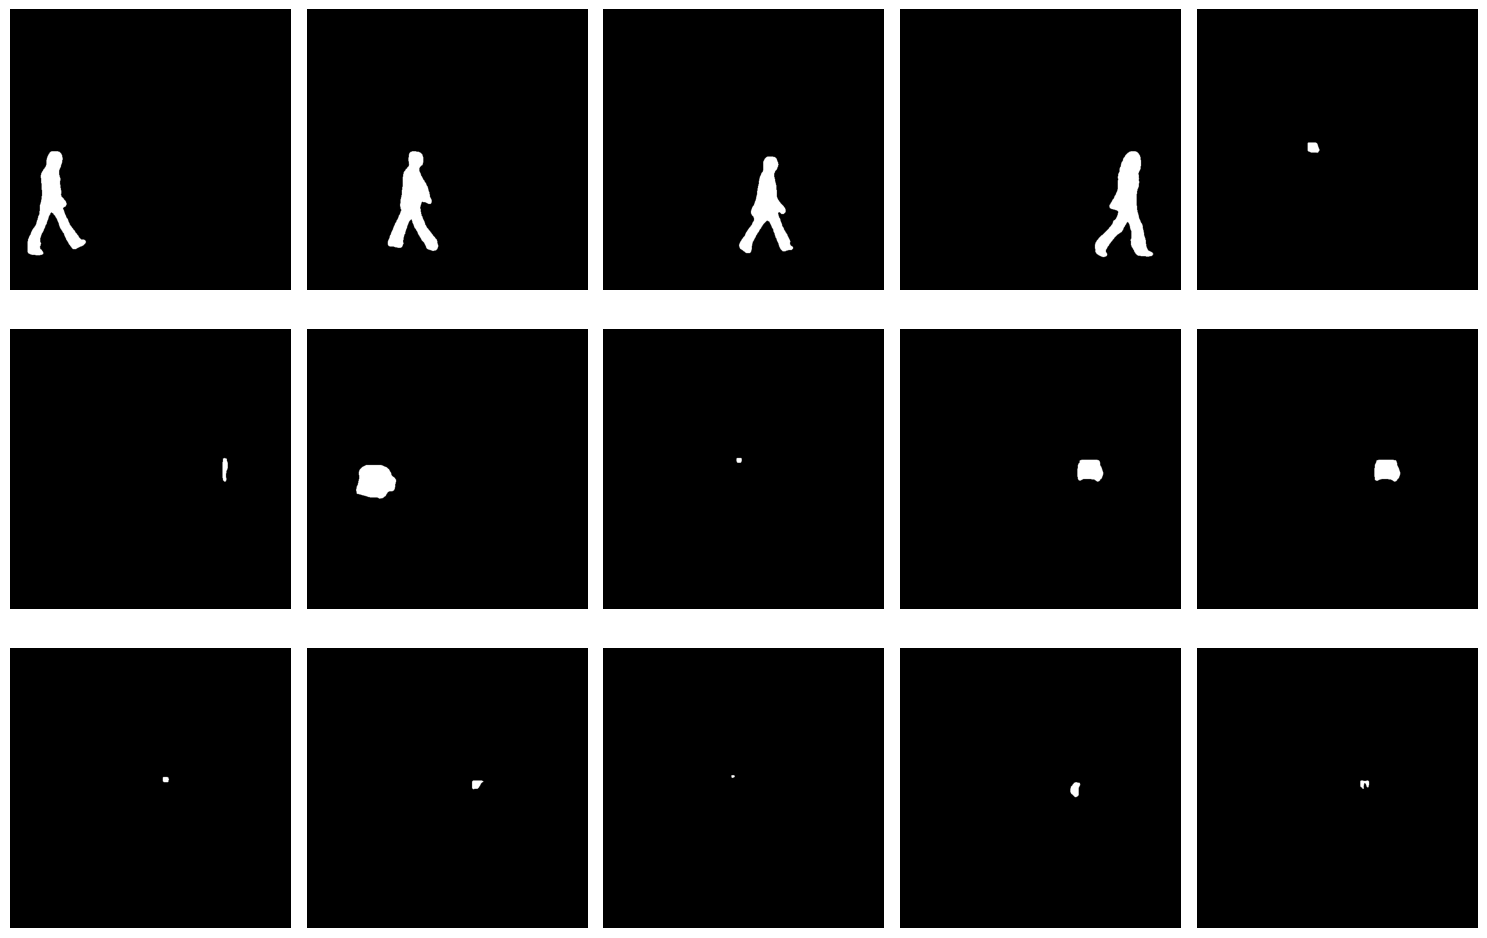

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i in range(15):
    plt.subplot(3, 5, i+1)
    # Tensor를 cpu(ram)으로 옮기고 uint8타입의 ndarry로 변환
    img = mask.data[i].to('cpu').numpy().astype('uint8')
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [40]:
result.masks.segments

[array([[    0.14687,     0.50625],
        [    0.14531,     0.50781],
        [    0.14375,     0.50781],
        [    0.14062,     0.51094],
        [    0.14062,      0.5125],
        [     0.1375,     0.51562],
        [     0.1375,     0.51719],
        [    0.13594,     0.51875],
        [    0.13594,     0.52031],
        [    0.13438,     0.52188],
        [    0.13438,     0.52344],
        [    0.13281,       0.525],
        [    0.13281,     0.52812],
        [    0.13125,     0.52969],
        [    0.13125,     0.53438],
        [    0.12969,     0.53594],
        [    0.12969,     0.55313],
        [    0.12812,     0.55469],
        [    0.12812,     0.55781],
        [    0.12656,     0.55937],
        [    0.12656,     0.56094],
        [    0.12344,     0.56406],
        [    0.12344,     0.56563],
        [    0.11875,     0.57031],
        [    0.11875,     0.57187],
        [    0.11719,     0.57344],
        [    0.11719,       0.575],
        [    0.11406,     0.

(800, 800, 3) <class 'numpy.ndarray'>
<class 'list'> 15 <class 'numpy.ndarray'> (364, 2)


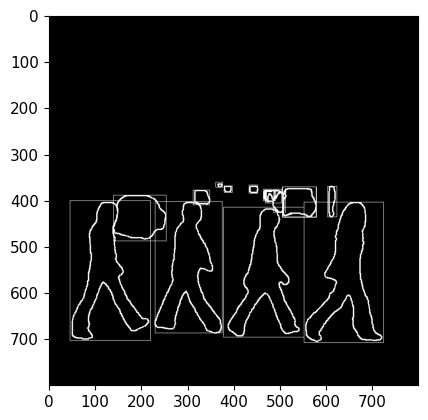

In [60]:
img = result.orig_img  # 추론할때 사용한 원본이미지.
print(img.shape, type(img))
h, w, _ = img.shape
# print(h, w)
w_h = np.array([[w, h]])
w_h.shape
result_array = np.zeros((h, w))
# print(result_array.shape)

seg = mask.segments  #각 instance에대한 좌표들을 리스트에 담아서 반환. [ndarray(N, 2), ndarray(N, 2), ..]
xyxy = result.boxes.xyxy.to('cpu').numpy().astype('int32')
print(type(seg), len(seg), type(seg[0]), seg[0].shape)
for i in range(len(seg)):
    coords = (seg[i] * w_h).astype('int32')
    xyxy_coord = xyxy[i]
    cv2.polylines(result_array, [coords], True, (255, 255, 255), thickness=2)
    cv2.rectangle(result_array, pt1=xyxy_coord[:2], pt2=xyxy_coord[2:], color=(255,255,255))
plt.imshow(result_array, cmap='gray')
plt.show()

In [49]:
(seg[0] * w_h).astype('int32')  # polygon의 x,y좌표를 원래 이미지 크기에 맞게 계산한뒤 정수로 변환.

array([[117, 405],
       [116, 406],
       [114, 406],
       [112, 408],
       [112, 409],
       [110, 412],
       [110, 413],
       [108, 415],
       [108, 416],
       [107, 417],
       [107, 418],
       [106, 419],
       [106, 422],
       [104, 423],
       [104, 427],
       [103, 428],
       [103, 442],
       [102, 443],
       [102, 446],
       [101, 447],
       [101, 448],
       [ 98, 451],
       [ 98, 452],
       [ 94, 456],
       [ 94, 457],
       [ 93, 458],
       [ 93, 459],
       [ 91, 462],
       [ 91, 463],
       [ 89, 465],
       [ 89, 466],
       [ 88, 467],
       [ 88, 471],
       [ 87, 472],
       [ 87, 480],
       [ 88, 481],
       [ 88, 494],
       [ 89, 496],
       [ 89, 513],
       [ 91, 515],
       [ 91, 531],
       [ 89, 532],
       [ 89, 541],
       [ 88, 542],
       [ 88, 547],
       [ 87, 548],
       [ 87, 552],
       [ 86, 553],
       [ 86, 556],
       [ 85, 557],
       [ 85, 573],
       [ 83, 575],
       [ 83,

In [56]:
xyxy = result.boxes.xyxy.to('cpu').numpy().astype('int32')
xyxy

array([[ 45, 401, 219, 703],
       [229, 403, 374, 687],
       [377, 415, 551, 696],
       [551, 404, 723, 708],
       [311, 378, 347, 410],
       [602, 370, 622, 436],
       [139, 389, 253, 488],
       [378, 369, 396, 383],
       [505, 371, 578, 437],
       [504, 371, 577, 436],
       [432, 367, 451, 385],
       [467, 376, 502, 406],
       [360, 361, 375, 372],
       [485, 382, 511, 426],
       [463, 376, 489, 401]])

# custom dataset training

- custom dataset training은 object detection과 동일
- custom dataset: https://universe.roboflow.com/angelo-maglasang-vuuq3/crack_flip_rotate/dataset/1

1. labeling
    - 이미지 파일당 한개의 txt
    - 한줄에 하나의 instance에 대한 설정. 
    ```
    label x1 y1 x2 y2 .....  # x,y가 polygon 의 좌표
    ```
2. 학습관련 설정
    - yaml 파일
        - train: train set의 경로
        - val: validation set의 경로
        - test: test set의 경로
        - nc: 클래스개수
        - names: [클래스 이름]

In [61]:
ft_model = YOLO('models/yolov8n-seg.pt') # pretrained 모델의 경로 => fine tuning
ft_model.train(data='crack_flip_rotate.v1i.yolov8/data.yaml', # 데이터셋 설정파일
               epochs=100, 
               batch=32,  # default: 16
               imgsz=640, # default: 640
               patience=30, # 조기종료 조건. 
               optimizer='Adam'
              )

New https://pypi.org/project/ultralytics/8.0.53 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.51  Python-3.9.0 torch-1.13.1+cpu CPU
yolo\engine\trainer: task=segment, mode=train, model=models/yolov8n-seg.pt, data=crack_flip_rotate.v1i.yolov8/data.yaml, epochs=100, patience=30, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None,

KeyboardInterrupt: 

In [62]:
from glob import glob
from ultralytics import YOLO
best_model_path = 'models/crack_best.pt'
image_files_path = glob('test_image_seg/crack*.jpg')
image_files_path

['test_image_seg\\crack1.jpg',
 'test_image_seg\\crack2.jpg',
 'test_image_seg\\crack3.jpg',
 'test_image_seg\\crack4.jpg',
 'test_image_seg\\crack5.jpg',
 'test_image_seg\\crack6.jpg',
 'test_image_seg\\crack7.jpg']

In [63]:
best_model = YOLO(best_model_path)
crack_result_list = []
for path in image_files_path:
    r = best_model(path, save=True, save_txt=True)[0]
    crack_result_list.append(r)


image 1/1 C:\Classes\07_vision\yolo\test_image_seg\crack1.jpg: 640x640 1 crack, 264.6ms
Speed: 0.5ms preprocess, 264.6ms inference, 29.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict4
1 label saved to runs\segment\predict4\labels

image 1/1 C:\Classes\07_vision\yolo\test_image_seg\crack2.jpg: 640x640 1 crack, 223.9ms
Speed: 3.1ms preprocess, 223.9ms inference, 9.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict4
2 labels saved to runs\segment\predict4\labels

image 1/1 C:\Classes\07_vision\yolo\test_image_seg\crack3.jpg: 640x640 2 cracks, 211.0ms
Speed: 5.5ms preprocess, 211.0ms inference, 15.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict4
3 labels saved to runs\segment\predict4\labels

image 1/1 C:\Classes\07_vision\yolo\test_image_seg\crack4.jpg: 640x640 1 crack, 238.8ms
Speed: 4.3ms preprocess, 238.8ms inference, 9.0ms postprocess per image at shape (1, 3, 64